In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

# Define dataset root path
dataset_root = "/content/drive/MyDrive/Project5_Ag_Crop and weed detection (2)/agri_data"

# Paths to images and labels
images_path = os.path.join(dataset_root, "data")
labels_path = os.path.join(dataset_root, "data")  # Labels are in the same folder

# Check if paths exist
if os.path.exists(images_path) and os.path.exists(labels_path):
    print("✅ Dataset paths verified!")
else:
    print("❌ Check dataset path!")


✅ Dataset paths verified!


In [3]:
import shutil
import glob
from sklearn.model_selection import train_test_split

# Create YOLO folders
os.makedirs("data/images/train", exist_ok=True)
os.makedirs("data/images/val", exist_ok=True)
os.makedirs("data/labels/train", exist_ok=True)
os.makedirs("data/labels/val", exist_ok=True)

# Get all image files
image_files = glob.glob(os.path.join(images_path, "*.jpeg"))  # Adjust if different extension
image_files.sort()

# Get corresponding label files
label_files = [f.replace(".jpeg", ".txt") for f in image_files]

# Split data into training (80%) and validation (20%)
train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)
train_labels = [f.replace(".jpeg", ".txt") for f in train_images]
val_labels = [f.replace(".jpeg", ".txt") for f in val_images]

# Move files into respective folders
for img, lbl in zip(train_images, train_labels):
    shutil.copy(img, "data/images/train/")
    shutil.copy(lbl, "data/labels/train/")

for img, lbl in zip(val_images, val_labels):
    shutil.copy(img, "data/images/val/")
    shutil.copy(lbl, "data/labels/val/")

print("✅ Dataset structured for YOLO training.")


✅ Dataset structured for YOLO training.


In [4]:
# Define class names (Crop & Weed)
class_names = ["crop", "weed"]

# Create data.yaml content
yaml_content = f"""
train: /content/data/images/train
val: /content/data/images/val

nc: {len(class_names)}
names: {class_names}
"""

# Save data.yaml
with open("data.yaml", "w") as yaml_file:
    yaml_file.write(yaml_content)

print("✅ data.yaml created successfully!")


✅ data.yaml created successfully!


In [5]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [6]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO('yolov8s.pt')

model.train(
    data="data.yaml",
    epochs=30,  # Decrease from 50 to 30
    batch=16,  # Keep batch size
    imgsz=512,  # Image size
    patience=5,  # Early stopping after 5 epochs without improvement
    lr0=0.01,  # Adjust learning rate if needed
    optimizer="Adam"  # Adam optimizer speeds up convergence
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 217MB/s]


Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/data/labels/train... 1040 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1040/1040 [00:02<00:00, 348.79it/s]

train: New cache created: /content/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/labels/val... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<00:00, 364.52it/s]


val: New cache created: /content/data/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.789      2.139      1.851         49        512: 100%|██████████| 65/65 [28:34<00:00, 26.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:25<03:22, 25.25s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:47<02:43, 23.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 3/9 [01:10<02:19, 23.22s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 4/9 [01:33<01:55, 23.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 5/9 [01:55<01:31, 22.78s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 6/9 [02:19<01:09, 23.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 7/9 [02:42<00:46, 23.02s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [03:07<00:00, 20.83s/it]

                   all        260        416   0.000841     0.0752   0.000546   0.000236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.887      1.984      1.911         51        512: 100%|██████████| 65/65 [28:09<00:00, 26.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:28<00:00, 16.55s/it]

                   all        260        416     0.0033      0.293    0.00249    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.796      1.836      1.841         59        512: 100%|██████████| 65/65 [28:22<00:00, 26.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:33<00:00, 17.11s/it]

                   all        260        416     0.0112      0.316    0.00747    0.00221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.721       1.72      1.768         38        512: 100%|██████████| 65/65 [27:59<00:00, 25.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:28<00:00, 16.47s/it]

                   all        260        416      0.118      0.525      0.151     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.677      1.669      1.725         51        512: 100%|██████████| 65/65 [28:03<00:00, 25.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:28<00:00, 16.46s/it]

                   all        260        416      0.562       0.45      0.468      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.627      1.605      1.685         40        512: 100%|██████████| 65/65 [28:02<00:00, 25.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:27<00:00, 16.39s/it]

                   all        260        416       0.32      0.491       0.34      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.567      1.557      1.657         42        512: 100%|██████████| 65/65 [27:47<00:00, 25.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:27<00:00, 16.44s/it]

                   all        260        416      0.771      0.618      0.743      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.578       1.53      1.633         44        512: 100%|██████████| 65/65 [27:41<00:00, 25.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:32<00:00, 16.91s/it]

                   all        260        416      0.604      0.587      0.542      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.528      1.482      1.627         64        512: 100%|██████████| 65/65 [27:39<00:00, 25.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:27<00:00, 16.42s/it]

                   all        260        416      0.653      0.546      0.638      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.507      1.456      1.586         58        512: 100%|██████████| 65/65 [27:50<00:00, 25.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:41<00:00, 17.94s/it]

                   all        260        416      0.758      0.577      0.708      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.457      1.379      1.564         43        512: 100%|██████████| 65/65 [27:26<00:00, 25.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:28<00:00, 16.48s/it]

                   all        260        416      0.741      0.644      0.732      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.478      1.373      1.572         48        512: 100%|██████████| 65/65 [27:23<00:00, 25.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:26<00:00, 16.23s/it]

                   all        260        416      0.641      0.636      0.673      0.349
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 7, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



12 epochs completed in 6.102 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:11<00:00, 14.61s/it]


                   all        260        416      0.772      0.621      0.743      0.409
                  crop        128        246      0.722      0.512      0.706       0.41
                  weed        133        170      0.822      0.729       0.78      0.408
Speed: 2.2ms preprocess, 493.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1d3f89bc90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
metrics = model.val()
print("✅ Final Accuracy:", metrics)


Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/data/labels/val.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:11<00:00,  7.75s/it]


                   all        260        416      0.772      0.621      0.743      0.409
                  crop        128        246      0.722      0.512      0.706       0.41
                  weed        133        170      0.822      0.729       0.78      0.408
Speed: 1.5ms preprocess, 496.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
✅ Final Accuracy: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1daf0c5f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.0180

In [9]:
metrics = model.val()
print("✅ Model Performance:", metrics)


Ultralytics 8.3.76 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/data/labels/val.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [02:27<00:00,  8.69s/it]


                   all        260        416      0.772      0.621      0.743      0.409
                  crop        128        246      0.722      0.512      0.706       0.41
                  weed        133        170      0.822      0.729       0.78      0.408
Speed: 1.7ms preprocess, 556.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train3
✅ Model Performance: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1d489ccc10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.0


image 1/1 /content/drive/MyDrive/Project5_Ag_Crop and weed detection (2)/agri_data/data/agri_0_1009.jpeg: 512x512 1 weed, 424.4ms
Speed: 2.7ms preprocess, 424.4ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)


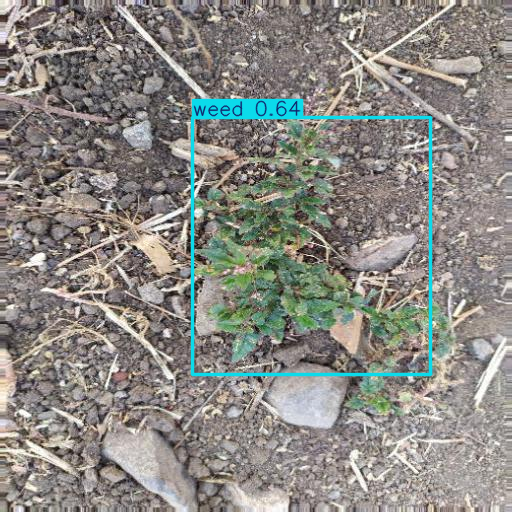

In [13]:
test_image = "/content/drive/MyDrive/Project5_Ag_Crop and weed detection (2)/agri_data/data/agri_0_1009.jpeg"  # Change this to an actual image path

# Run inference on an image
results = model(test_image)

# Loop through results and display each one
for result in results:
    result.show()




In [15]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Move the model to Google Drive
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/
print("✅ Model saved to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to Google Drive!


In [17]:
!zip -r best_model.zip /content/runs/detect/train/weights/best.pt
files.download("best_model.zip")


  adding: content/runs/detect/train/weights/best.pt (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>